In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.style.use('seaborn-whitegrid')
import random

In [2]:
A = np.array([[1, -2], [-1,-1], [0,-1], [1, 0], [1, 1]])
b = np.array([7, -8, -4, 6, 11])

In [3]:
A.shape[0]

5

##Assuming x>=0


No handles with labels found to put in legend.


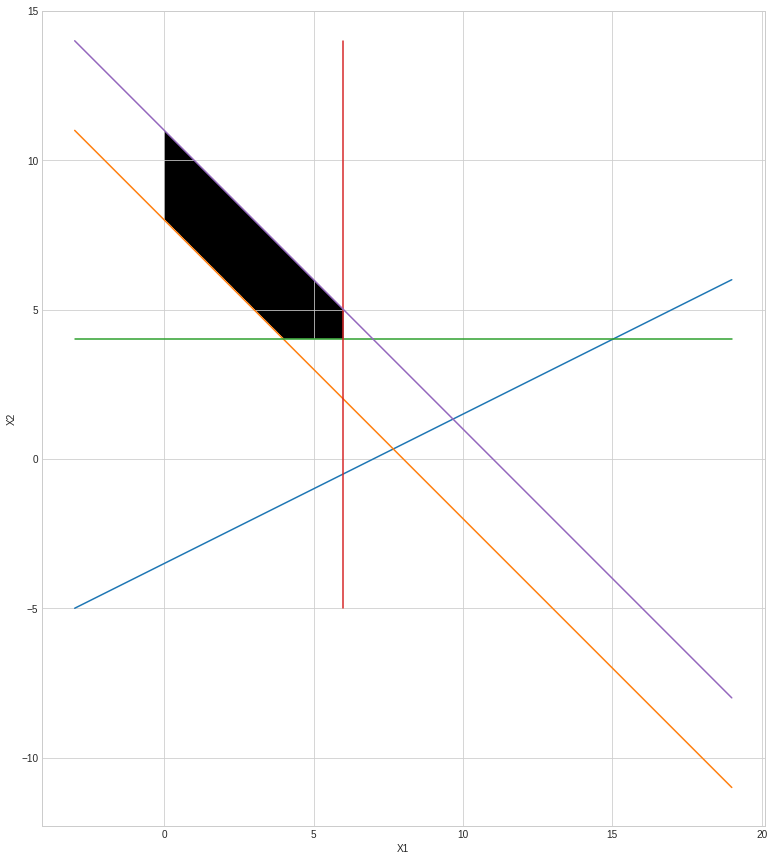

In [4]:
a = np.linspace(0,15,500)

x,y = np.meshgrid(a,a)
plt.figure(figsize=(15,15))
plt.grid()
plt.imshow( ((-2*y<=7-x) & (-y<=-8+x) & (-y<=-4) & (x<=6)& (y<=11-x)).astype(int) , extent=(x.min(),x.max(),y.min(),y.max()),origin="lower");

for i in range(0, A.shape[0]):
  if A[i,1] != 0:
    x = np.arange(-3, 20, 1)
    y = (1/A[i, 1])*(b[i]-A[i, 0]*x)
  else:
    y = np.arange(-5, 15, 1)
    x = np.array([b[i]/A[i,0] for j in y])

  plt.plot(x, y)
plt.grid()
plt.xlabel("X1")
plt.ylabel("X2")

plt.legend(loc = 'upper right')
plt.show()

Legend:
Red- x1 = 6
Orange- x1+x2 = 8
Blue- x1 - 2x2 = 7
Purple- x1+x2 = 11
Green- x2 = 4

#Q-1.2
####The extreme points (corner points) of the polytope given by the black shaded region in the above plot are: (4,4), (6, 5), (6,4), (0,8), (8,11)

#Q-1.4

In [5]:
init = []
x=[5, 0]
d = 0.001
n = 20
for i in range(n):
  init.append(x)
  x[0], x[1] = x[0] + d, x[1] 
  x = [x[0], x[1]]

In [6]:
def random_points(max_iter, init, num, d):
  k = 0
  A = init.copy()
  for k in range(max_iter):
    x = np.random.uniform(0,6)
    y = np.random.uniform(4,11)
    i = np.random.randint(0,19)
    A = np.delete(A, i, axis = 0)
    if 8<=x+y<= 11:
      Y = np.array([x,y])
      g = 0
      for j in range(len(A)):
        if np.linalg.norm(A[j]-Y)>=d:
          g = g+1
      if g == len(A):
        init[i] = Y
      k = k +1
    A = init.copy()
  return init

#Q-1.5

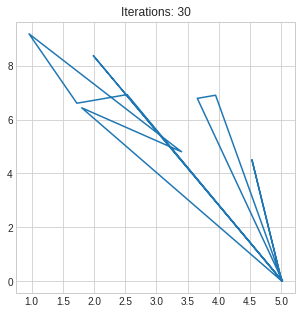

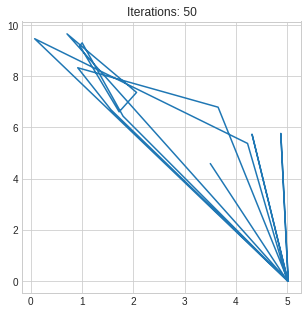

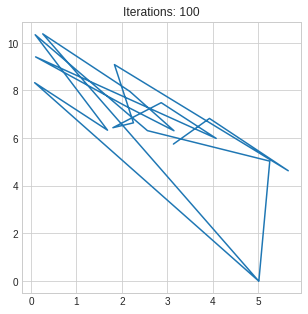

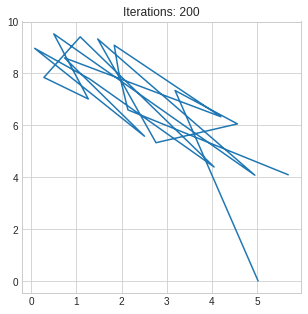

In [7]:
iters = [30, 50, 100 ,200]
init = []
x=[5, 0]
d = 0.001
for i in range(n):
  init.append(x)
  x[0], x[1] = x[0] + d, x[1] 
  x = [x[0], x[1]]
for i in iters:
  points = np.array(random_points(i, init, 20, d))
  plt.figure(figsize=(5,5))
  plt.plot(points[:,0], points[:,1])
  plt.title("Iterations: "+str(i))
  plt.show()

The plot with 200 iterations is more closer to polytope's original shape than with 30 iterations.



#Q-1.6

In [8]:
T = 10**6
def area(T):
  region = []
  k = 0
  while k <= T:
    x = np.random.uniform(0,6)
    y = np.random.uniform(4,11)
    if 8 <= x + y <= 11:
      region.append([x, y])
    k = k + 1
  area = 42*(len(region)/T)
  return area
print('Area of the given polytope is:', area(T))

Area of the given polytope is: 16.01985


#Q-1.7

In [9]:
def extreme_points(A, b):
  assert type(A) is np.ndarray
  assert type(b) is np.ndarray
  points = []
  for i in range(A.shape[0]-1):
    for j in range(i+1,A.shape[0]):
      X = np.array([A[i],A[j]])
      #print(X.shape)
      c = 0
      if np.linalg.det(X) != 0:
        feas_x = np.dot(np.linalg.inv(X),np.array([b[i],b[j]]))
        for k in range(A.shape[0]):
          if np.dot(A[k],feas_x)<=b[k]:
            c = c + 1
      if c == A.shape[0]:
        points.append(list(feas_x))
  return points

In [10]:
A = np.array([[1, -2 ], [-1, -1], [0, -1], [1, 0], [1, 1], [-1, 0], [0, -1]])
b = np.array([7, -8, -4, 6, 11, 0, 0])
points = extreme_points(A, b)
print("Extreme points of bounded polytope are:", points)
A = np.array([[1, -2 ], [-1, -1], [0, -1], [1, 0], [1, 1]])
b = np.array([7, -8, -4, 6, 11])
points = extreme_points(A, b)
print("Extreme points of unbounded polytope are:", points)

Extreme points of bounded polytope are: [[4.0, 4.0], [0.0, 8.0], [6.0, 4.0], [6.0, 5.0], [0.0, 11.0]]
Extreme points of unbounded polytope are: [[4.0, 4.0], [6.0, 4.0], [6.0, 5.0]]
